# Analyzing Correlating Factors in Amazon Product Reviews

In [1]:
import pandas
import nltk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from numpy import polyfit
import scipy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import os
from math import *
import math
import os.path
import sklearn.feature_extraction.text
from sklearn.cross_validation import cross_val_score
from  sklearn.feature_extraction.text import CountVectorizer
from  sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import nltk


C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pandas.read_json('phone.json', lines=True)
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,120401325X,"[0, 0]",4,They look good and stick good! I just don't li...,"05 21, 2014",A30TL5EWN6DFXT,christina,Looks Good,1400630400
1,120401325X,"[0, 0]",5,These stickers work like the review says they ...,"01 14, 2014",ASY55RVNIL0UD,emily l.,Really great product.,1389657600
2,120401325X,"[0, 0]",5,These are awesome and make my phone look so st...,"06 26, 2014",A2TMXE2AFO7ONB,Erica,LOVE LOVE LOVE,1403740800
3,120401325X,"[4, 4]",4,Item arrived in great time and was in perfect ...,"10 21, 2013",AWJ0WZQYMYFQ4,JM,Cute!,1382313600
4,120401325X,"[2, 3]",5,"awesome! stays on, and looks great. can be use...","02 3, 2013",ATX7CZYFXI1KW,patrice m rogoza,leopard home button sticker for iphone 4s,1359849600


In [3]:
#After pre-processing our json we can begin analysis of our factors. 
#We'll study Helpfullness Rating, ReviewTime, Lexical Diversity, Sentiment and Trends/Keywords
#as they correlate to the Reviewer's Product Review Score

# Review Score Vs. Helpfulness Rating

In [ ]:
#Since the helpfulness rating is a criteria that OTHER consumers guage a review on, the rating can be thought
#of as a measure of influence one review has on other consumers' spending choices and product opinions.
#Do the the most helpful reviews primarily correlate with positive reviews
#or is there an entirely different correlation?

## Data Processing Step for Review Score Vs. Helpulness Rating

helpfulScores = []
helpfulScoresNormalized = []
overallsNormalized = []
stop = 1000

for a,b in zip( df.helpful[0:stop], df.overall[0:stop] ):
    if int(a[1]) == 0:
        helpfulScores.append(0)
    else:
         helpfulScores.append( float(a[0])/float(a[1]))
         overallsNormalized.append(int(b))
         helpfulScoresNormalized.append( float(a[0])/float(a[1]))
            
helpfulScores = np.array(helpfulScores)
helpfulScoresNormalized = np.array(helpfulScoresNormalized)
overallsNormalized =  np.array(overallsNormalized)

## Dimensionality Reduct-Visualization for Review Score Vs. Helpfulness Rating

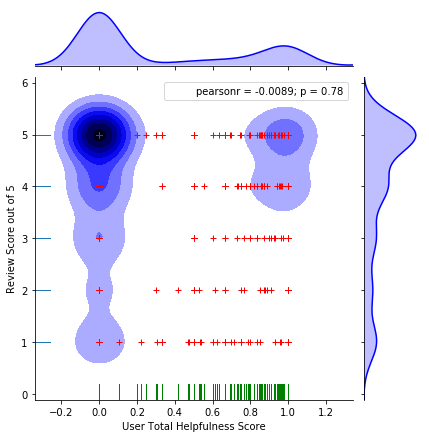

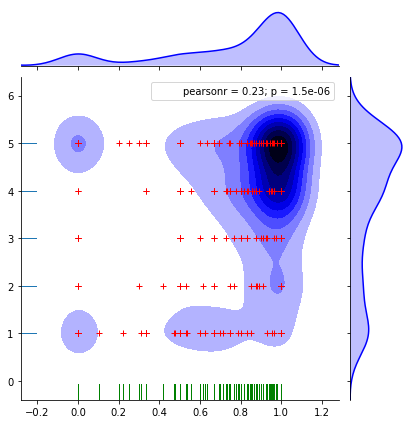

In [27]:
#plt.subplots_adjust(top=0.9)
#g.fig.suptitle('THIS IS A TITLE, YOU BET') # can also get the figure from plt.gcf()

g = sns.jointplot(x=helpfulScores, y=df.overall[0:stop].as_matrix(), kind="kde", color="Blue")
g.plot_joint(plt.scatter, c="r", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("User Total Helpfulness Score (Percent)", "Review Score (out of 5)")
sns.rugplot(helpfulScores, color="g", ax=g.ax_joint)
sns.rugplot(df.overall[0:stop].as_matrix(), vertical=True, ax=g.ax_joint)

plt.show()


#Now let's also normalize our data to exclude reviews 
#with 0/0 helpfulness rating  (indicating no helpfulness score has been given)

g = sns.jointplot(x=helpfulScoresNormalized, y=overallsNormalized, kind="kde", color="Blue")
g.plot_joint(plt.scatter, c="r", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("User Total Helpfulness Score (Percent)", "Review Score (out of 5)")
sns.rugplot(helpfulScoresNormalized, color="g", ax=g.ax_joint)
sns.rugplot(overallsNormalized, vertical=True, ax=g.ax_joint)

plt.show()

## Linear and Poly Regression for Review Score vs Helpfulness Rating 

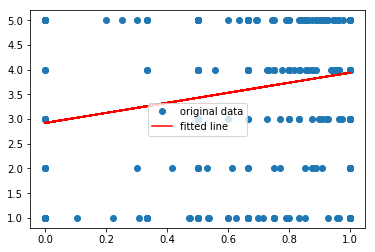

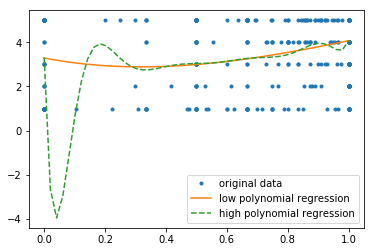

In [6]:

scipy.stats.linregress(helpfulScoresNormalized,overallsNormalized )

slope, intercept, r_value, p_value, std_err = stats.linregress(helpfulScoresNormalized,overallsNormalized )
plt.plot(helpfulScoresNormalized, overallsNormalized, 'o', label='original data')
plt.plot(helpfulScoresNormalized, intercept + slope*helpfulScoresNormalized, 'r', label='fitted line')
plt.legend()
plt.show()

lowPoly  = np.poly1d(polyfit(helpfulScoresNormalized, overallsNormalized,np.random.randint(2, high=10, dtype="I") ))
highPoly = np.poly1d(polyfit(helpfulScoresNormalized, overallsNormalized,np.random.randint(10, high=13, dtype="I") ))


xpts = np.linspace(0, 1, 50)
plt.plot(helpfulScoresNormalized, overallsNormalized,'.',label='original data')
plt.plot(xpts, lowPoly(xpts), '-', label='low polynomial regression')
plt.plot(xpts, highPoly(xpts), '--',label='high polynomial regression')
plt.legend()
plt.show()

# Review Score Vs.Time (Of Posted Review)

In [ ]:
#While one may not expect to find any significant correlation between time of posted reviews and review score, there may
#be some unexpected correlations between these factors. In technology related products, performance, battery life, durability
#and price expectations -and thus reviews for products may change rapidly due to the innovative nature of the tech industry.

# Dimensionality Reduct-Visualization for Review Score Vs. Time

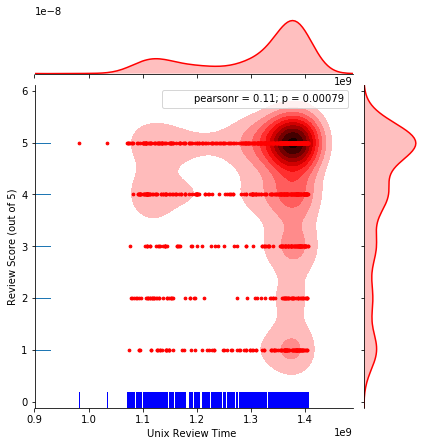

In [28]:
g = sns.jointplot(x=df.unixReviewTime[0:stop].as_matrix(), y=df.overall[0:stop].as_matrix(), kind="kde", color="Red")
g.plot_joint(plt.scatter, c="r", s=30, linewidth=1, marker=".")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("Unix Review Time ", "Review Score (out of 5)")
sns.rugplot(df.unixReviewTime[0:stop].as_matrix(), color="b", ax=g.ax_joint)
sns.rugplot(df.overall[0:stop].as_matrix(), vertical=True, ax=g.ax_joint)

plt.show()

# Linear and Poly Regression for Review Score Vs Time

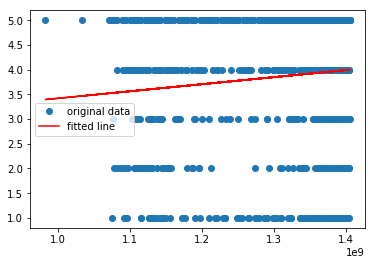

In [8]:
df.unixReviewTime[0:stop].as_matrix()
df.overall[0:stop]

#Linear and Poly Regression for Helpfulness vs Overall Rating 
scipy.stats.linregress(df.unixReviewTime[0:stop].as_matrix(),df.overall[0:stop].as_matrix() )

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df.unixReviewTime[0:stop].as_matrix()
                                                               ,df.overall[0:stop].as_matrix() )
plt.plot(df.unixReviewTime[0:stop].as_matrix(), df.overall[0:stop].as_matrix(), 'o', label='original data')
plt.plot(df.unixReviewTime[0:stop].as_matrix(), intercept + slope*df.unixReviewTime[0:stop].as_matrix()
         , 'r', label='fitted line')
plt.legend()
plt.show()

#Poly Regression for this data too oscilatory for stabile graph

#lowPoly  = np.poly1d(polyfit(df.unixReviewTime[0:stop].as_matrix(), df.overall[0:stop].as_matrix()
#                             ,np.random.randint(2, high=3, dtype="I") ))
#highPoly = np.poly1d(polyfit(df.unixReviewTime[0:stop].as_matrix(), df.overall[0:stop].as_matrix(),
#                             np.random.randint(10, high=11, dtype="I") ))


#xpts = np.linspace(1, 2, 100)
#plt.plot(df.unixReviewTime[0:stop].as_matrix(), df.overall[0:stop].as_matrix(),'.',label='original data')
#plt.plot(xpts, lowPoly(xpts), '-', label='low polynomPoly Regresial regression')
#plt.plot(xpts, highPoly(xpts), '--',label='high polynomial regression')
#plt.legend()

#plt.show()

# Review Score Vs. Keywords Frequency Analysis

In [ ]:
#A popular analysis for social media and marketing, our keyword analysis will allow us to discover the top terms in the set our
#Amazon reviews. We may expect indicitive words such as cost, cheap, good, bad, etc to be most frequently used in most of
#our reviews. After finding the most frequent words,we will then analyze
#correlations between review scores and reviews that freuently use our trend-words/keywords. 

#In a real world application, one might want to analyze review score Vs. Trend for one one word at a time 
#(or use their own set of simularly related keywords) to get a more zoomed in look at how a 
#topic or trend influences review score

## Processing Keywords and Frequency

In [9]:
gbl_corpus = []
counts = []
ctNorm = []
OvrNorm = []

for a in df.reviewText[0:stop]:
    gbl_corpus.append(a)

cv = CountVectorizer(stop_words = "english")
matrix = cv.fit_transform(gbl_corpus)Linear and Poly Regression for Review Score Vs Time
frequency = [(vocab, matrix.getcol(stats).sum()) for vocab, stats in cv.vocabulary_.items()]


top = ['','','','','']
topIndex = [0,0,0,0,0]
       
for a in frequency:
    topIndex.append(a[1])
    if (topIndex.index(min(topIndex)) == 5):
            del topIndex[5]
    else:
            del  top[(topIndex.index(min(topIndex)))]
            del  topIndex[(topIndex.index(min(topIndex)))]      
            top.append(a[0])
    
print top
print topIndex



for a,c in zip(df.reviewText[0:stop] , df.overall[0:stop] ) :
    ct = 0 
    sent = a.split()
    for b in sent:
        if b in top:
            ct += 1
    counts.append(ct)
    if ct > 0:
        ctNorm.append(ct)
        OvrNorm.append(c)
        
    
counts  = np.array(counts)
overalls = df.overall[0:stop].as_matrix()
OvrNorm = np.array(OvrNorm)
ctNorm = np.array(ctNorm)

[u'headset', u'great', u'like', u'phone', u'use']
[383, 387, 372, 1078, 376]


## Dimensionality Reduct-Visualization for Review Score Vs. Keyword Frequency

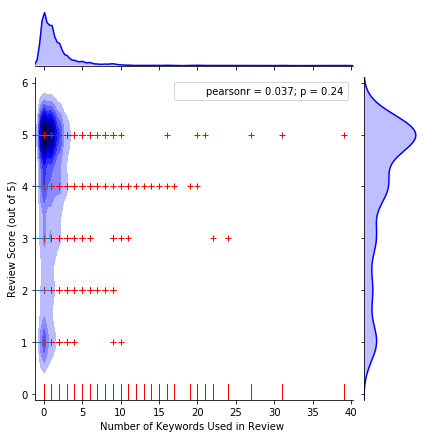

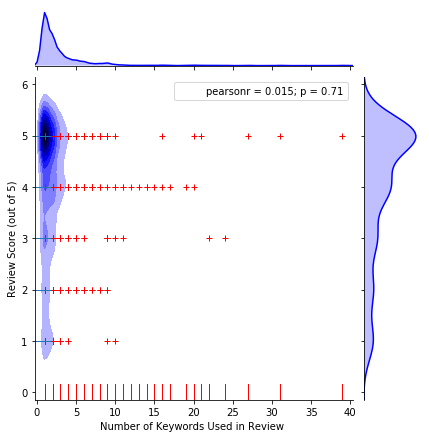

In [29]:
g = sns.jointplot(x=counts, y=overalls, kind="kde", color="Blue")
g.plot_joint(plt.scatter, c="r", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("Number of Keywords Used in Review ", "Review Score (out of 5)")
sns.rugplot(counts, color="r", ax=g.ax_joint)
sns.rugplot(overalls, vertical=True, ax=g.ax_joint)

plt.show()

#Normalized to show how people who did use the words rate the product

g = sns.jointplot(x=ctNorm, y=OvrNorm, kind="kde", color="Blue")
g.plot_joint(plt.scatter, c="r", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("Number of Keywords Used in Review ", "Review Score (out of 5)")
sns.rugplot(ctNorm, color="r", ax=g.ax_joint)
sns.rugplot(OvrNorm, vertical=True, ax=g.ax_joint)

plt.show()


## Linear and Poly Regression for Review Score  vs Keword Frequency

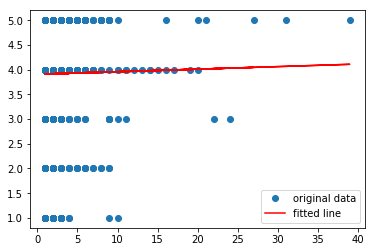

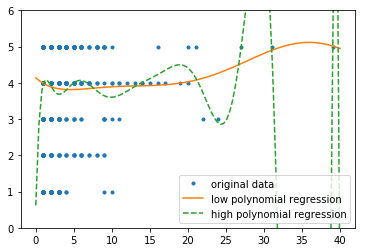

In [11]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(ctNorm,OvrNorm )
plt.plot(ctNorm, OvrNorm, 'o', label='original data')
plt.plot(ctNorm, intercept + slope*ctNorm, 'r', label='fitted line')
plt.legend()
plt.show()

lowPoly  = np.poly1d(polyfit(ctNorm,OvrNorm,np.random.randint(2, high=10, dtype="I") ))
highPoly = np.poly1d(polyfit(ctNorm,OvrNorm,np.random.randint(10, high=15, dtype="I") ))


xpts = np.linspace(0, 40, 100)
plt.plot(ctNorm, OvrNorm,'.',label='original data')
plt.plot(xpts, lowPoly(xpts), '-', label='low polynomial regression')
plt.plot(xpts, highPoly(xpts), '--',label='high polynomial regression')
plt.legend()
plt.ylim(0,6)
plt.show()

# Review Score Vs Lexical Diversity

In [ ]:
#Are more articulate reviews associated with better or worse ratings? If a product has specific criticisms, maybe more reviewers
#are willing to articulate on those issues and good product reviews are shorter. Maybe vice versa?

## Processing Lexical Diversity

In [12]:
def lexical_diversity(text):
    return len(set(text)) / ((len(text))*1.0)

divRates = []
 
for a in df.reviewText[0:stop]:
    if len(a) <= 0 :
        divRates.append(0)
    else:
        divRates.append(lexical_diversity(a))
        
divRates = np.array(divRates)

## Dimensionality Reduct-Visualization for Review Score Vs. Lexical Diveristy

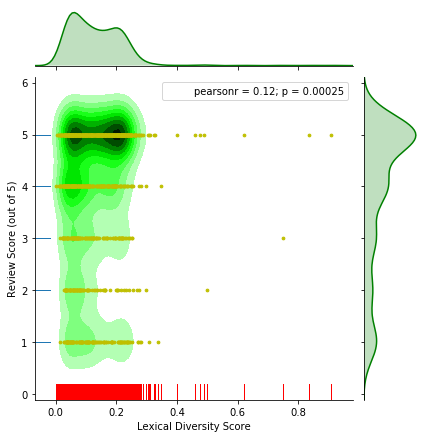

In [31]:
g = sns.jointplot(x=divRates, y=df.overall[0:stop].as_matrix(), kind="kde", color="Green")
g.plot_joint(plt.scatter, c="y", s=30, linewidth=1, marker=".")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("Lexical Diversity Score","Review Score (out of 5)")
sns.rugplot(divRates, color="red", ax=g.ax_joint)
sns.rugplot(df.overall[0:stop].as_matrix(), vertical=True, ax=g.ax_joint)

plt.show()

## Linear and Poly Regression for Review Score Vs. Keyword Frequency

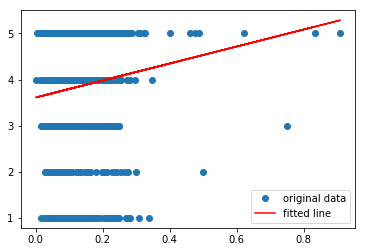

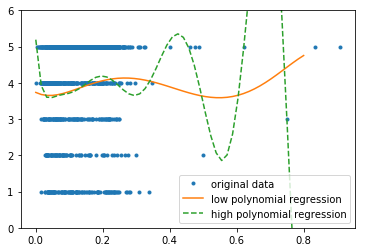

In [33]:
#Linear and Poly Regression for Helpfulness vs Overall Rating 
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(divRates,df.overall[0:stop].as_matrix() )
plt.plot(divRates, df.overall[0:stop].as_matrix(), 'o', label='original data')
plt.plot(divRates, intercept + slope*divRates, 'r', label='fitted line')
           
#plt.plot(divRates, intercept + slope*divRates, 'r', label='fitted line')
plt.legend()
plt.show()

df.unixReviewTime[0:stop].as_matrix()
lowPoly  = np.poly1d(polyfit(divRates, df.overall[0:stop].as_matrix(),np.random.randint(2, high=10, dtype="I") ))
highPoly = np.poly1d(polyfit(divRates, df.overall[0:stop].as_matrix(),np.random.randint(10, high=13, dtype="I") ))


xpts = np.linspace(0, .8, 50)
plt.plot(divRates, df.overall[0:stop].as_matrix(),'.',label='original data')
plt.plot(xpts, lowPoly(xpts), '-', label='low polynomial regression')
plt.plot(xpts, highPoly(xpts), '--',label='high polynomial regression')
plt.legend()
plt.ylim(0,6)
plt.show()

# Review Score Vs Sentiment Analysis

In [ ]:
#Are higher rated reviewers more critical of products? Perhaps this is a stronger trend with 4 Star reviews?

## Data Processsing For Sentiment Analysis

In [15]:
sentiment = []

for a in df.reviewText[0:stop]:
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(a)
    sentiment.append(ss['compound'])

sentiment = np.array(sentiment)  

## Dimensionality Reduct-Visualization for Review Scores Vs. Sentiment Analysis

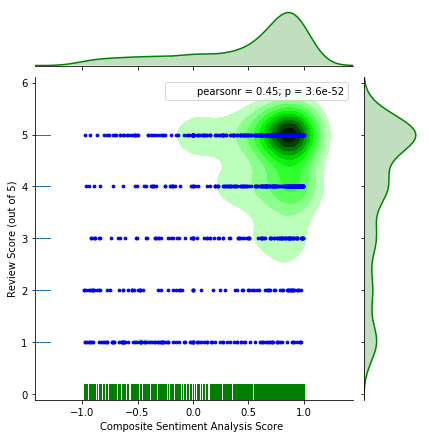

In [32]:
g = sns.jointplot(x=sentiment, y=df.overall[0:stop].as_matrix(), kind="kde", color="Green")
g.plot_joint(plt.scatter, c="b", s=30, linewidth=1, marker=".")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("Composite Sentiment Analysis Score ","Review Score (out of 5)")
sns.rugplot(sentiment, color="g", ax=g.ax_joint)
sns.rugplot(df.overall[0:stop].as_matrix(), vertical=True, ax=g.ax_joint)

plt.show()

## Linear and Poly Regression for Review Score Vs. Sentiment Analysis

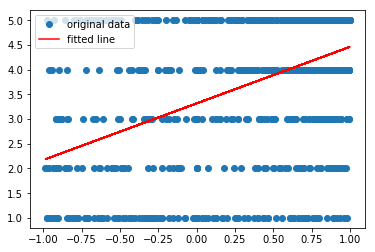

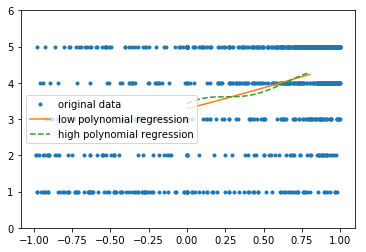

In [26]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(sentiment,df.overall[0:stop].as_matrix() )
plt.plot(sentiment, df.overall[0:stop].as_matrix(), 'o', label='original data')
plt.plot(sentiment, intercept + slope*sentiment, 'r', label='fitted line')
           
#plt.plot(divRates, intercept + slope*divRates, 'r', label='fitted line')
plt.legend()
plt.show()

df.unixReviewTime[0:stop].as_matrix()
lowPoly  = np.poly1d(polyfit(sentiment, df.overall[0:stop].as_matrix(),np.random.randint(2, high=10, dtype="I") ))
highPoly = np.poly1d(polyfit(sentiment, df.overall[0:stop].as_matrix(),np.random.randint(10, high=13, dtype="I") ))


xpts = np.linspace(0, .8, 50)
plt.plot(sentiment, df.overall[0:stop].as_matrix(),'.',label='original data')
plt.plot(xpts, lowPoly(xpts), '-', label='low polynomial regression')
plt.plot(xpts, highPoly(xpts), '--',label='high polynomial regression')
plt.legend()
plt.ylim(0,6)
plt.show()

# Multiple Regression Analaysis?